In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd

from matplotlib import gridspec
from mpl_toolkits.axes_grid.axislines import SubplotZero

plt.xkcd()

None

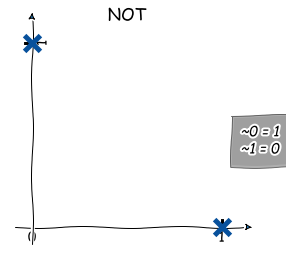

In [2]:
fig = plt.figure(1)
fig.set_size_inches(4,4)
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for k,v in [("xzero", ""), ("yzero", "")]:
    ax.axis[k].set_axisline_style("-|>")
    ax.axis[k].set_visible(True)
    ax.axis[k].set_label(v)
    ax.axis[k].set_zorder(-20)

ax.xaxis.set_ticks((0,1))
ax.yaxis.set_ticks((1,))

for direction in ["left", "right", "bottom", "top"]:
    ax.axis[direction].set_visible(False)

ax.scatter((0,1), (1,0), marker="x", s=250, lw=5, facecolor="#08519c")

ax.text(1.1, 0.4,
        "~0 = 1\n~1 = 0",
        style="italic",
        bbox={"facecolor": 'grey', 'alpha':0.5, 'pad': 10})
plt.title('NOT')

In [27]:
def sigmoid(z):
    return 1. / (1 + np.exp(-z))

activate = np.vectorize(sigmoid, otypes=[np.dtype('float64')])

In [28]:
def threshold(a):
    if a >= 0.5:
        return 1
    else:
        return 0

h = np.vectorize(threshold, otypes=[np.dtype('int8')])

In [35]:
def create_training_set(Truth, m):
    rows, cols = Truth.shape
    
    train = np.ones(shape=(m, cols+1))
    train[:, 1:cols+1] = np.vstack(Truth[np.random.randint(0, rows, size=m)])
    X = train[:, 0:cols]
    y = train[:, cols:cols+1]
    
    return X,y

def predict(theta, X):
    z = X.dot(theta.T)
    a = activate(z)
    return h(a)

In [ ]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    
    m = X.shape[0]
    
    z = X.dot(theta.T).sum(axis=1)
    a = activation(z)
    y_hat = h(a)
    
    cost_simple = np.add(np.multiply(y, np.log1p(y_hat)),
                         np.multiply(1-y, np.log1p(1-y_hat)))
    
    reg = (LAMBDA/2) * np.square(theta[:, 1:X.shape[1]]).sum()
    
    cost = (-1./m) * (cost_simple.sum() + reg)
    
    return cost